In [1]:
# thank you: https://github.com/foutaise/texttable/
from texttable import Texttable
table = Texttable()
table_cells = []
for i in range(0,1): #0

    labels = ['Red Signal']
    cols = [ labels[i],  'redmask', 'V sum', 'V sum metrics' ]
        
    each_row = []
    for j in range(0,4): # 0,1,2,3
        each_row.append(cols[j] + '({},{})'.format(i,j))
        
    table_cells.append(each_row)
    
table.add_rows(table_cells)
print(table.draw() + '\n')

+-----------------+--------------+------------+--------------------+
| Red Signal(0,0) | redmask(0,1) | V sum(0,2) | V sum metrics(0,3) |
+=================+==============+============+====================+
+-----------------+--------------+------------+--------------------+



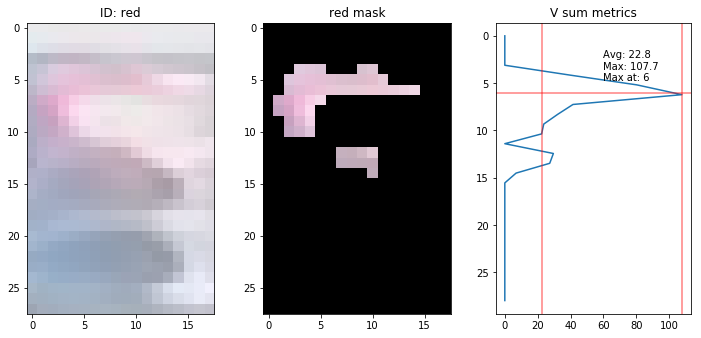

In [100]:
%matplotlib inline 

from IPython.display import Image, display, HTML
from loaders import STANDARDIZED_LIST
import matplotlib.pyplot as plt
from matplotlib import animation
import cv2
import numpy as np
from random import randint


nrows = 1
ncols = 3   
f, axArray = plt.subplots(nrows, ncols, figsize=(10,5))  
f.tight_layout()
plt.subplots_adjust(bottom=0.15, hspace=1)

def getMaskedImage(image, label):
    """
    Returns the masked image as per label specified. For eg, label as 'Red' would 
    result in red areas extracted out of incoming image, and resultant image returned.
    NOTE INCOMING IMAGE IS RGB (if you used cv.imread,it would be BGR. I used matplotlib imread)
    """
    # first convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    if label is 'red':
        red_mask_hsv1 = cv2.inRange(image_hsv, (0,25,50), (12,255,255))
        red_mask_hsv2 = cv2.inRange(image_hsv, (150,25,50), (180,255,255))
        mask_hsv = cv2.bitwise_or(red_mask_hsv1,red_mask_hsv2)
    elif label is 'yellow':
        mask_hsv = cv2.inRange(image_hsv, (10,10,210),(31,255,255))   
    else: # green
        mask_hsv = cv2.inRange(image_hsv,(33,12,120),(110,255,255)) 
        
    # standard mask operations to extract out specified label color
    mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
    masked_image = np.copy(image)
    masked_image[mask_hsv != 0] = [0, 0, 0] 
    
    return masked_image

def getHSVSum(image):
    """
    Input: RGB image (ensure, its not BGR)
    Output: HSV sums individually
    """
    # first convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # HSV channels
    h = image_hsv[:,:,0]
    s = image_hsv[:,:,1]
    v = image_hsv[:,:,2]
    h_sum = np.sum(h[:,:],axis=1)
    s_sum = np.sum(s[:,:],axis=1)
    v_sum = np.sum(v[:,:],axis=1)    
    
    return (h_sum, s_sum, v_sum)

# what if
def getHSVMax(image):
    """
    Input: RGB image (ensure, its not BGR)
    Output: HSV max individually
    """
    # first convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # HSV channels
    h = image_hsv[:,:,0]
    s = image_hsv[:,:,1]
    v = image_hsv[:,:,2]
    h_max = h.max(axis=1)
    s_max = h.max(axis=1)
    v_max = h.max(axis=1)    
    
    return (h_max, s_max, v_max)


#[axArray[i,j].set_ylim([0,6000]) for i in range(0,nrows) for j in range(1,ncols)]    
 

# get the image
#num = randint(0, len(STANDARDIZED_LIST)-1)
num = 234
image = STANDARDIZED_LIST[num][0]
label = STANDARDIZED_LIST[num][1]

# one hot decoding
label = 'red' if label[0]==1 else 'yellow' if label[1]==1 else 'green'

# crop it
image = image[2:-2, 7:-7, :]    

# area (note we are taking it after crop)
(width,height,_) = image.shape
area = width*height 

# initialize axes
axArray[0].set_title('ID: {}'.format(label))
axArray[1].set_title('{} mask'.format(label))
axArray[2].set_title('V sum metrics')

# show original image
axArray[0].imshow(image)

# other cols
masked_image = getMaskedImage(image,label) 
axArray[1].imshow(masked_image)

# V sum
hsv_sum = getHSVSum(masked_image)
summy = hsv_sum[2]  # v sum
summy_avg = summy/width
average = round(np.sum(summy)/area,1) # normalized avg across area

# V sum metrics
max_x = np.argmax(summy)
max_y = round(summy_avg[max_x],1)
text = 'Avg: ' + str(average) + '\nMax: ' + str(max_y) + '\nMax at: ' + str(max_x)
axArray[2].annotate(text,xy=(0.55, 0.8), xycoords="axes fraction")   

x_new = np.linspace(0,len(summy_avg),len(summy_avg))
axArray[2].invert_yaxis()
axArray[2].plot(summy_avg, x_new)
axArray[2].axhline(y=max_x, color='r', alpha=0.5)
axArray[2].axvline(x=average, color='r', alpha=0.5)
axArray[2].axvline(x=max_y, color='r', alpha=0.5)

plt.show()

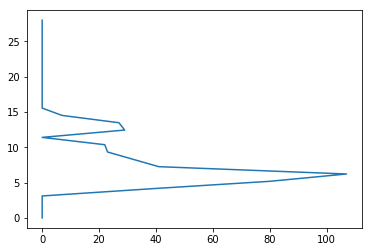

In [87]:
import matplotlib.pyplot as plt
import numpy as np

"""
[  0.           0.           0.           0.          39.46428571
  80.25       107.71428571  41.46428571  32.21428571  23.67857143
  22.39285714   0.          29.53571429  27.32142857   6.85714286
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.        ]
"""

y = [0,0,0,0,39,80,107,41,32,23,22,0,29,27,7,0,0,0,0,0,0,0,0,0,0,0,0,0]
#y = 2*x
x = np.linspace(0,len(y),len(y))

plt.plot(y,x)
plt.show()